## Loading Datasets

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('laptop_data.csv')
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
print('Duplicated sum values:', df.duplicated().sum(), '\n')
print('Missing sum values:')
print(df.isnull().sum())

Duplicated sum values: 0 

Missing sum values:
Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


In [6]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832


In [8]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg', '')

In [9]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000


In [10]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [11]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float32
Price               float64
dtype: object

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='TypeName'>

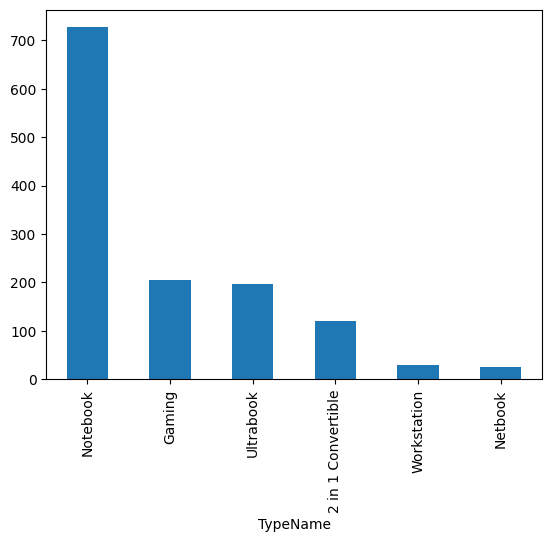

In [13]:

df['TypeName'].value_counts().plot(kind='bar')

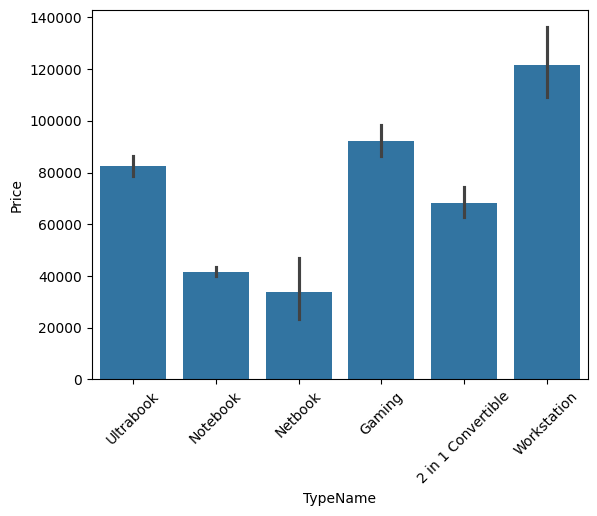

In [14]:
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Inches', ylabel='Density'>

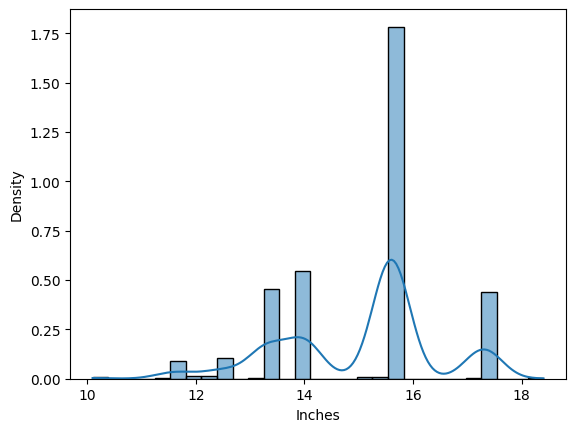

In [15]:
sns.histplot(df['Inches'], kde=True, stat='density')

In [16]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

#### Terms to focus on: Touchscreen

In [17]:
import pandas as pd

df['Touchscreen'] = (df['ScreenResolution'].str.contains('Touchscreen')).astype(int)


In [18]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
916,HP,Notebook,13.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.49,51148.80,0
428,HP,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,3.35,106506.72,0
749,HP,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Xeon E3-1535M v5 2.9GHz,16,256GB SSD,Nvidia Quadro M2000M,Windows 7,3.00,233845.92,0
1196,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,AMD Radeon R5 M430,No OS,1.90,19607.04,0
235,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,256GB SSD,AMD Radeon R7 M445,Linux,2.36,47898.72,0


<Axes: xlabel='Touchscreen'>

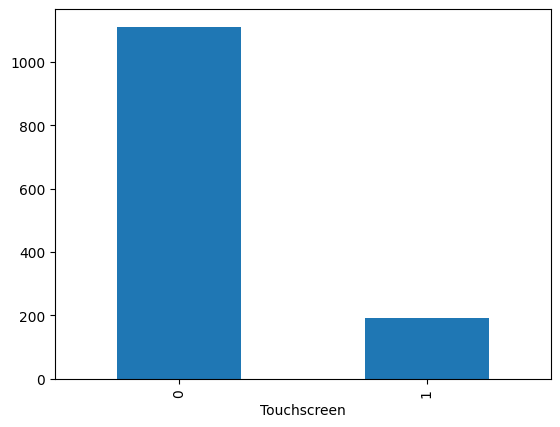

In [19]:
df['Touchscreen'].value_counts().plot(kind='bar')

In [20]:
df['Ips'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [21]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
121,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 2TB HDD,Nvidia GeForce GTX 1070,Windows 10,1.80,119427.1200,0,0
303,Lenovo,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,2TB HDD,Nvidia GeForce 940MX,No OS,2.20,29250.7200,0,0
583,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.93,81912.1392,0,0
858,Dell,Notebook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6200U 2.3GHz,8,1TB HDD,Intel HD Graphics 520,Windows 10,1.62,34578.7200,1,0
236,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Linux,2.10,20779.2000,0,0
580,Mediacom,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Celeron Quad Core N3450 1.1GHz,4,32GB SSD,Intel HD Graphics 500,Windows 10,1.45,20725.9200,0,1
80,Dell,Ultrabook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.88,58403.4048,0,1
377,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.60GHz,4,500GB HDD,Intel HD Graphics 400,Windows 10,1.80,16463.5200,0,0
594,Lenovo,Notebook,17.3,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,No OS,2.80,28185.1200,0,0
816,Razer,Ultrabook,12.5,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7500U 2.5GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.29,95850.7200,1,1


<Axes: xlabel='Ips', ylabel='Price'>

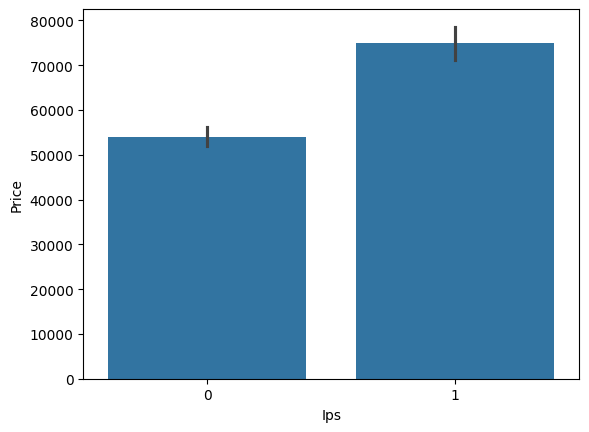

In [22]:
sns.barplot(x=df['Ips'], y=df['Price'])

In [23]:
SplitResolution = df['ScreenResolution'].str.split('x', n=1, expand=True)

In [24]:
df['X_res'] = SplitResolution[0]
df['Y_res'] = SplitResolution[1]

In [26]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
470,HP,2 in 1 Convertible,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.29,106506.7200,1,1,IPS Panel 4K Ultra HD / Touchscreen 3840,2160
374,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.62,46300.8528,1,0,Full HD / Touchscreen 1920,1080
1004,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.20,63669.6000,0,0,Full HD 1920,1080
182,Lenovo,2 in 1 Convertible,13.9,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,1.40,98514.7200,1,1,IPS Panel 4K Ultra HD / Touchscreen 3840,2160
1255,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,Windows 10,2.00,18061.9200,0,0,1366,768
1292,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,500GB HDD,Intel HD Graphics,Windows 10,2.20,20193.1200,0,0,1366,768
1037,Toshiba,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.47,91908.0000,0,1,IPS Panel Full HD 1920,1080
393,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.70,71874.7200,0,0,Full HD 1920,1080
203,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.20,93186.7200,0,1,IPS Panel Full HD 1920,1080
774,HP,Ultrabook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,4,256GB SSD,Intel HD Graphics 520,Windows 10,1.26,66280.3200,0,0,1366,768


In [27]:
df['X_res'] = df['X_res'].str.replace(',', '').str.findall(
    r'(\d+\.?\d+)').apply(lambda x: x[0])

In [28]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080


In [30]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [31]:
df['Price'].dtypes

dtype('float64')

In [32]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [35]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))
             ** 0.5/df['Inches']).astype(float)

In [36]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [37]:
df.drop(columns=['ScreenResolution'], inplace=True)

In [38]:
df.drop(columns=['Inches', 'X_res', 'Y_res'], inplace=True)

In [39]:
df.head(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998


In [40]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

#### Making Cpu Categories
- Intel Core i3
- Intel Core i5 
- Intel Core i7 
- AMD Chips
- Others (Intel Celeron, Pentium, Atom, Xeon, etc)

In [42]:
 df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [43]:
df.sample(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
824,Lenovo,Ultrabook,Intel Core i5 7200U 2.5GHz,8,256GB Flash Storage,Intel HD Graphics 620,Windows 10,1.13,99900.0000,0,1,157.350512,Intel Core i5
1170,HP,Notebook,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.96,36177.1200,0,0,141.211998,Intel Core i7
954,Lenovo,Ultrabook,Intel Core i7 6600U 2.6GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.70,79333.3872,0,1,157.350512,Intel Core i7


In [44]:
def fetch_processor(text):
    if text == 'Intel Core i3' or text == 'Intel Core i5' or text == 'Intel Core i7':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [45]:
df['Cpu Brand'] = df['Cpu Name'].apply(fetch_processor)

In [46]:
df.sample(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu Brand
611,Dell,Gaming,Intel Core i7 6700HQ 2.6GHz,16,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59,46833.6528,0,0,141.211998,Intel Core i7,Intel Core i7
746,Samsung,Ultrabook,Intel Core i7 7500U 2.7GHz,16,256GB SSD,Intel HD Graphics 620,Windows 10,0.81,87858.7200,0,0,165.632118,Intel Core i7,Intel Core i7
1079,HP,Notebook,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 7,2.31,50083.2000,0,0,141.211998,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu Brand'>

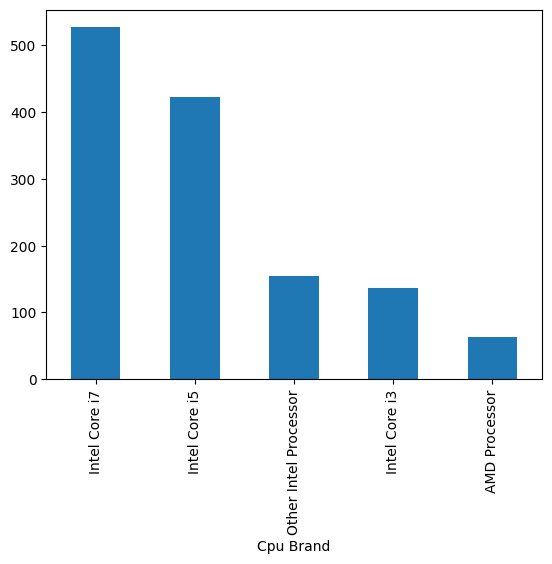

In [47]:
df['Cpu Brand'].value_counts().plot(kind='bar')

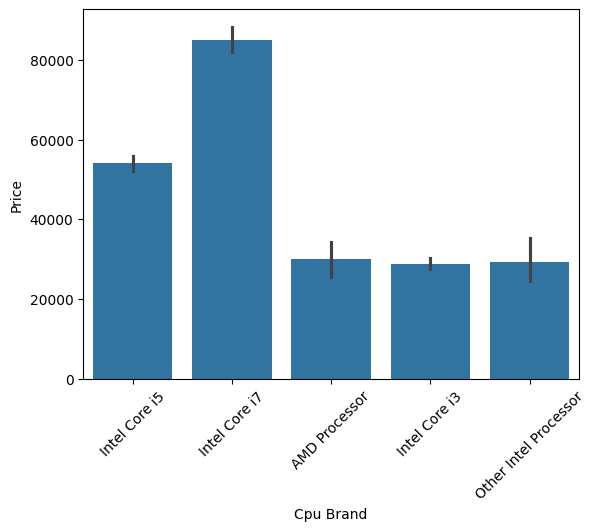

In [48]:
sns.barplot(x=df['Cpu Brand'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

In [49]:
df.drop(columns=['Cpu', 'Cpu Name'], inplace=True)

In [50]:
df.head(1)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

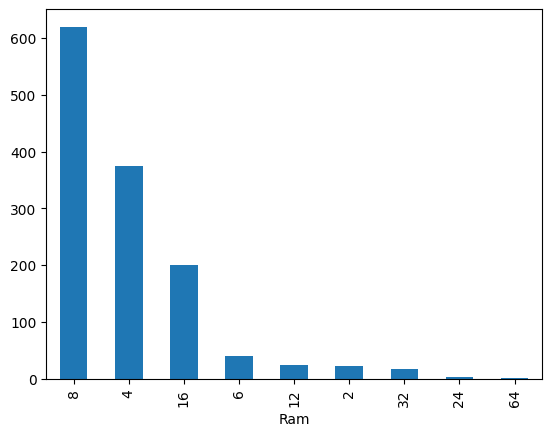

In [51]:
df['Ram'].value_counts().plot(kind='bar')

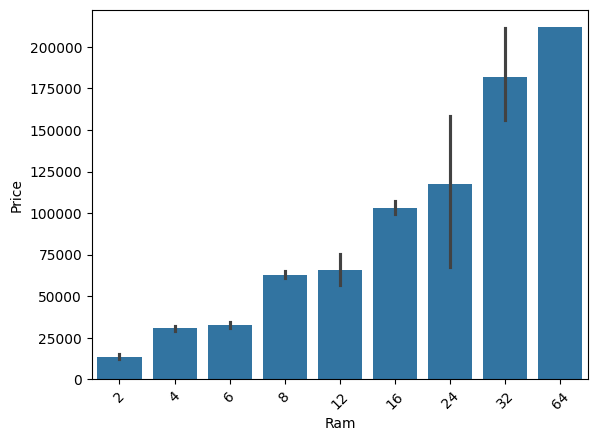

In [52]:
sns.barplot(x=df['Ram'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

- Seems as RAM increases, Price Increases in a linear manner

In [53]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [54]:
import pandas as pd

df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

new = df["Memory"].str.split("+", n=1, expand=True)

df["first"] = new[0]
df["first"] = df["first"].str.strip()

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in str(x) else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in str(x) else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in str(x) else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in str(x) else 0)

df['first'] = df['first'].str.extract('(\d+)').astype(float)

df["second"] = new[1]
df["second"].fillna("0", inplace=True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in str(x) else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in str(x) else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in str(x) else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in str(x) else 0)

df['second'] = df['second'].str.extract('(\d+)').astype(float)

df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"]).astype(int)
df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"]).astype(int)
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"]).astype(int)
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"]).astype(int)

df.drop(columns=['first', 'second',
                 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage',
                 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'], inplace=True)


<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:27: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:27: SyntaxWarning: invalid escape sequence '\d'
C:\Users\rajee\AppData\Local\Temp\ipykernel_27440\646217290.py:3: SyntaxWarning: invalid escape sequence '\.'
  df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
C:\Users\rajee\AppData\Local\Temp\ipykernel_27440\646217290.py:17: SyntaxWarning: invalid escape sequence '\d'
  df['first'] = df['first'].str.extract('(\d+)').astype(float)
C:\Users\rajee\AppData\Local\Temp\ipykernel_27440\646217290.py:27: SyntaxWarning: invalid escape sequence '\d'
  df['second'] = df['second'].str.extract('(\d+)').astype(float)
C:\Users\rajee\AppData\Local\Temp\ipykernel_27440\646217290.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained as

In [55]:
df.sample(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
722,Lenovo,Ultrabook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.32,79866.7200,0,1,157.350512,Intel Core i5,0,256,0,0
277,Acer,Notebook,8,1000 HDD,Nvidia GeForce MX130,Windows 10,2.20,39693.6000,0,1,141.211998,Intel Core i7,1000,0,0,0
685,Dell,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,3.49,149916.6000,0,0,141.211998,Intel Core i7,1000,256,0,0
1152,Lenovo,Notebook,8,1000 HDD,AMD Radeon R5 M330,No OS,2.32,31914.7200,0,0,141.211998,Intel Core i5,1000,0,0,0
433,Lenovo,Workstation,16,512 SSD,Nvidia GeForce 940MX,Windows 10,2.30,130269.6000,0,1,282.423996,Intel Core i7,0,512,0,0
758,Dell,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,152859.7872,0,1,282.423996,Intel Core i7,1000,256,0,0
1133,HP,Ultrabook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.84,40066.5600,0,0,141.211998,Intel Core i7,0,256,0,0
485,Lenovo,Notebook,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.75,55890.7200,0,1,157.350512,Intel Core i5,0,256,0,0
546,Lenovo,Notebook,4,500 HDD,Intel HD Graphics 620,Windows 10,1.87,41824.8000,0,0,157.350512,Intel Core i5,500,0,0,0
608,Lenovo,2 in 1 Convertible,8,256 SSD,Intel HD Graphics 630,Windows 10,2.00,69210.7200,1,1,141.211998,Intel Core i7,0,256,0,0


In [56]:
df.drop(columns=['Memory'], inplace=True)

In [57]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [58]:
df.corr(numeric_only=True)['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [59]:
df.drop(columns=['Hybrid', 'Flash_Storage'], inplace=True)

In [60]:
df.sample(3)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD
297,Dell,Workstation,16,Nvidia Quadro M1200,Windows 10,3.42,153705.3408,0,0,127.335675,Intel Core i7,0,256
1100,Dell,Ultrabook,4,Intel HD Graphics 520,Windows 7,1.50,60480.7920,0,0,125.367428,Intel Core i3,500,0
125,HP,Notebook,4,Intel HD Graphics 400,No OS,1.86,13799.5200,0,0,100.454670,Other Intel Processor,500,0


In [61]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [62]:
df['GpuBrand'] = df['Gpu'].apply(lambda x: x.split()[0])

In [63]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand
296,Acer,Notebook,8,Nvidia GeForce GTX 1050 Ti,Linux,2.50,52161.12,0,0,141.211998,Intel Core i7,0,256,Nvidia
408,Lenovo,Notebook,4,Intel HD Graphics 520,Windows 10,2.20,21791.52,0,0,141.211998,Intel Core i3,500,0,Intel
1022,HP,Notebook,8,Intel HD Graphics 620,Windows 10,1.11,61218.72,0,1,165.632118,Intel Core i5,0,256,Intel
742,Toshiba,Notebook,8,Intel HD Graphics 620,Windows 10,1.25,81784.80,1,1,157.350512,Intel Core i5,0,256,Intel
1261,Asus,Ultrabook,8,Intel HD Graphics 515,Windows 10,1.20,38841.12,0,1,165.632118,Other Intel Processor,0,512,Intel


In [64]:
df['GpuBrand'].value_counts()

GpuBrand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [65]:
df = df[df['GpuBrand'] != 'ARM']

In [66]:
df['GpuBrand'].value_counts()

GpuBrand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

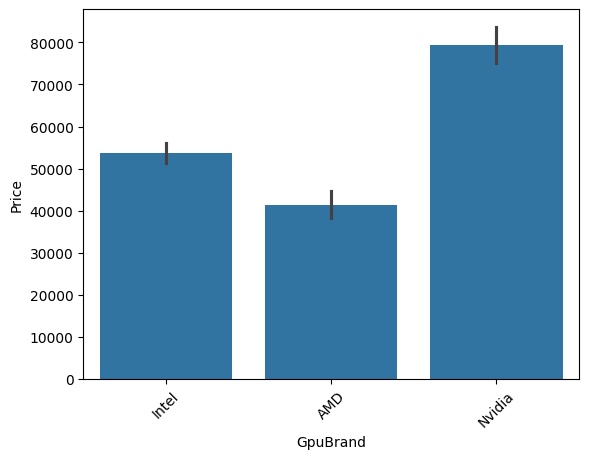

In [67]:
sns.barplot(x=df['GpuBrand'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

In [68]:
df.drop(columns=['Gpu'], inplace=True)

C:\Users\rajee\AppData\Local\Temp\ipykernel_27440\3949037655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Gpu'], inplace=True)


In [69]:
df.sample(4)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand
556,Mediacom,Notebook,4,Windows 10,1.35,13586.40,0,1,165.632118,Other Intel Processor,0,0,Intel
1286,Lenovo,Notebook,2,Windows 10,1.50,12201.12,0,0,111.935204,Other Intel Processor,0,0,Intel
1197,Asus,Gaming,16,Windows 10,4.30,114552.00,0,1,127.335675,Intel Core i7,1000,512,Nvidia
866,Toshiba,Ultrabook,8,Windows 10,1.20,58341.60,0,0,117.826530,Intel Core i5,0,256,Intel


In [70]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

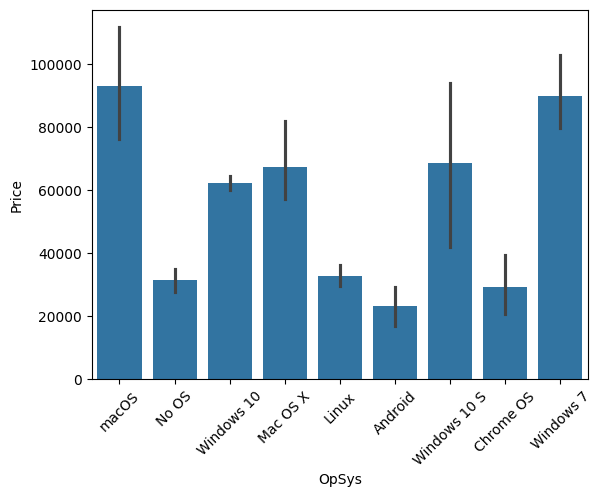

In [71]:
sns.barplot(x=df['OpSys'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

In [72]:
def categorizeOS(op):
    if op == 'Windows 10' or op == 'Windows 7' or op == 'Windows 10 S':
        return 'Windows'
    elif op == 'macOS' or op == 'Mac OS X':
        return 'Mac'
    else:
        return 'Linux/ChromeOS/Others'

In [73]:
df['os'] = df['OpSys'].apply(categorizeOS)

C:\Users\rajee\AppData\Local\Temp\ipykernel_27440\2303965691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['os'] = df['OpSys'].apply(categorizeOS)


In [74]:
df.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand,os
671,Lenovo,Notebook,8,Windows 10,1.90,43580.3760,0,0,141.211998,Intel Core i5,1000,128,AMD,Windows
446,Acer,Notebook,4,Linux,2.40,23539.1040,0,0,100.454670,Intel Core i5,500,0,Intel,Linux/ChromeOS/Others
1236,HP,Ultrabook,8,Windows 7,1.54,117119.5632,0,0,209.800683,Intel Core i7,0,256,Intel,Windows
147,Asus,Notebook,4,Windows 10,2.00,18328.3200,0,0,141.211998,Other Intel Processor,1000,0,Intel,Windows
157,Asus,2 in 1 Convertible,8,Windows 10,1.10,70063.2000,1,0,165.632118,Intel Core i5,0,256,Intel,Windows


In [75]:
df.drop(columns=['OpSys'], inplace=True)

C:\Users\rajee\AppData\Local\Temp\ipykernel_27440\2632010566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['OpSys'], inplace=True)


In [76]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Linux/ChromeOS/Others
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


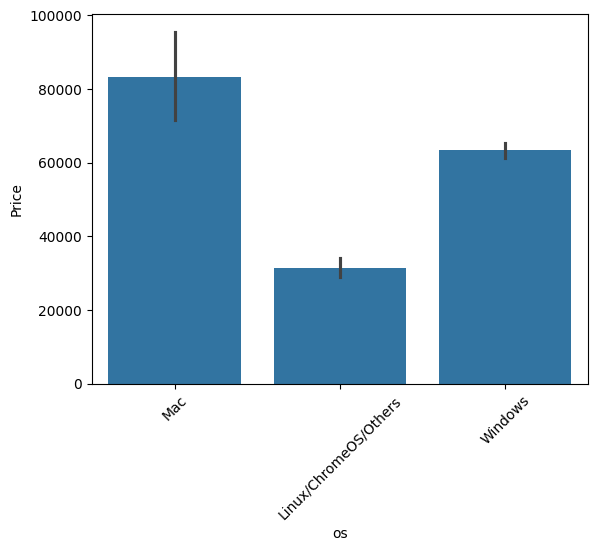

In [77]:
sns.barplot(x=df['os'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Weight', ylabel='Density'>

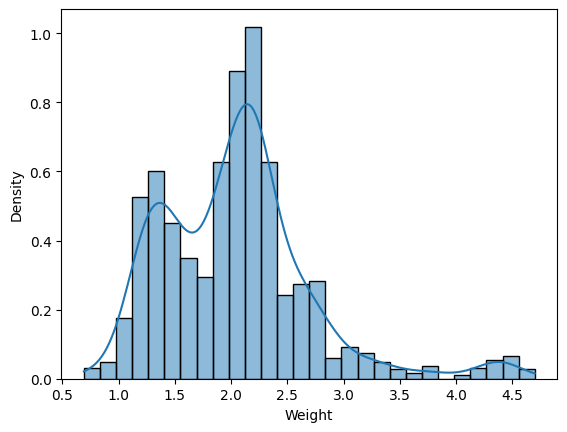

In [78]:
sns.histplot(df['Weight'], kde=True, stat='density')

<Axes: xlabel='Weight', ylabel='Price'>

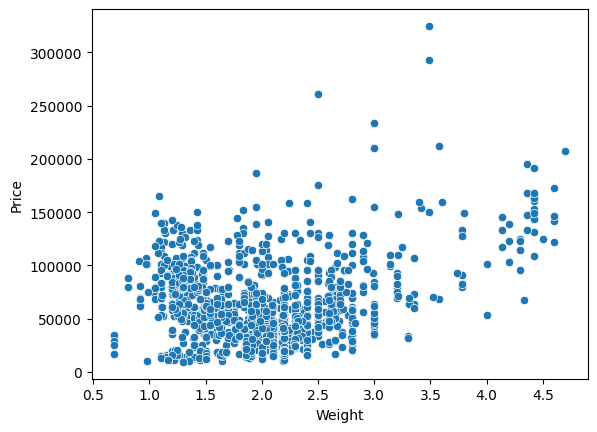

In [79]:
sns.scatterplot(x=df['Weight'], y=df['Price'])

In [80]:
df.corr(numeric_only=True)

,Ram,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD
Ram,1.000000,0.383362,0.742905,0.118875,0.207949,0.305688,0.095808,0.603379
Weight,0.383362,1.000000,0.209867,-0.293004,0.018643,-0.321883,0.514147,-0.063818
Price,0.742905,0.209867,1.000000,0.192917,0.253320,0.475368,-0.096891,0.670660
Touchscreen,0.118875,-0.293004,0.192917,1.000000,0.148026,0.458571,-0.208766,0.257577
Ips,0.207949,0.018643,0.253320,0.148026,1.000000,0.299142,-0.093588,0.225311
ppi,0.305688,-0.321883,0.475368,0.458571,0.299142,1.000000,-0.294698,0.509437
HDD,0.095808,0.514147,-0.096891,-0.208766,-0.093588,-0.294698,1.000000,-0.400750
SSD,0.603379,-0.063818,0.670660,0.257577,0.225311,0.509437,-0.400750,1.000000


<Axes: >

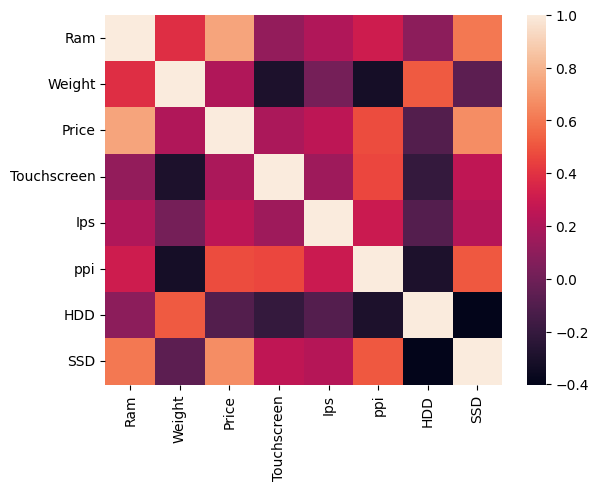

In [81]:
# Red means strongest correlation and white means extremely weak correlation
sns.heatmap(df.corr(numeric_only=True))

In [83]:
x = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [84]:
x.sample(10)

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand,os
332,Asus,Notebook,8,2.00,0,0,157.350512,Intel Core i7,1000,256,Intel,Windows
1175,Asus,Notebook,4,2.00,0,0,157.350512,Intel Core i3,0,256,Intel,Windows
479,Toshiba,Notebook,8,1.05,0,1,165.632118,Intel Core i5,0,256,Intel,Windows
606,Toshiba,Notebook,8,2.20,0,1,141.211998,Intel Core i7,0,256,Intel,Windows
706,Acer,2 in 1 Convertible,8,1.60,1,1,165.632118,Intel Core i5,0,256,Intel,Windows
879,HP,Notebook,4,2.04,0,0,141.211998,Intel Core i5,0,256,Intel,Windows
350,Dell,Notebook,16,2.06,1,0,282.423996,Intel Core i7,0,512,Nvidia,Windows
409,Lenovo,Notebook,2,1.15,0,0,135.094211,Other Intel Processor,0,0,Intel,Windows
641,HP,Notebook,8,2.60,0,0,107.985646,AMD Processor,1000,0,AMD,Windows
742,Toshiba,Notebook,8,1.25,1,1,157.350512,Intel Core i5,0,256,Intel,Windows


In [85]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

## Model Training

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.15, random_state=2)

In [87]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Linux/ChromeOS/Others
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Linux/ChromeOS/Others


In [88]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV


In [89]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR

In [90]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Linux/ChromeOS/Others
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


| Description       | Number | Description       | Number |
| ----------------- | ------ | ----------------- | ------ |
| Company           | 0      | ppi               | 6      |
| TypeName          | 1      | Cpu Brand         | 7      |
| Ram               | 2      | HDD               | 8      |
| Weight            | 3      | SSD               | 9      |
| Touchscreen       | 4      | Gpu Brand         | 10     |
| Ips               | 5      | os                | 11     |


In [92]:
transformers = [
    ('col_tnf', OneHotEncoder(
        sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
]

### Multiple Linear Regression

In [93]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8073277448418654
Mean Absolute Error: 0.21017827976428713


#### Ridge Regression


In [94]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8126380428568218
Mean Absolute Error: 0.20960380737000894


### Decision Tree


In [95]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8427329835953272
Mean Absolute Error: 0.18133786234223465


### Random Forest


In [96]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8847383535528592
Mean Absolute Error: 0.16163135423776417


### ExtraTrees



In [97]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                            random_state=3,
                            max_samples=0.5,
                            max_features=0.75,
                            max_depth=15,
                            bootstrap=True)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8826189087062304
Mean Absolute Error: 0.16425415402874108


### Gradient 



In [107]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8797176908556922
Mean Absolute Error: 0.15872017549385692


### Export Model
- Re-run the highest accuracy model again for recent R2 score
- Finally, export the model 

In [108]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Linux/ChromeOS/Others
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [109]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Linux/ChromeOS/Others
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Linux/ChromeOS/Others


In [113]:
import pickle

pickle.dump(df,open('laptop_data.pkl','wb'))
pickle.dump(pipe,open('pipe_object.pkl','wb'))

##### Re-run the highest accuracy tuned model again and Export the model

In [114]:
import pickle

pickle.dump(df,open('laptop_data.pkl','wb'))

with open('pipe_object.pkl', 'wb') as model_file:
    pickle.dump(best_estimator, model_file)